In [160]:
#imports
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt # for visualizations
from matplotlib.ticker import ScalarFormatter
import seaborn as sns # for visualizations
import numpy as np
import datetime as dt
from numpy import asarray

#model packages
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn import tree
import statsmodels.api as sm #linear regression tool
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from xgboost import XGBRegressor
import pickle

#Pre-processing and metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing #for normalizing values
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Spark
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, DoubleType, IntegerType, DateType
import pyspark.sql.functions as f

In [91]:
# Create the spark session and context.
spark = pyspark.sql.SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [3]:
# Create the schema with the column names, type, and nullable as true or false
schema = StructType([ \
    StructField("index", IntegerType(), True), \
    StructField("MLSNumber", StringType(), True), \
    StructField("DOM", IntegerType(), True), \
    StructField("CDOM", IntegerType(), True), \
    StructField("ListDate", StringType(), True), \
    StructField("AgreementOfSaleSignedLeaseDate", StringType(), True), \
    StructField("OffMarketDate", StringType(), True), \
    StructField("SettledDate", StringType(), True), \
    StructField("OriginalPrice", StringType(), True), \
    StructField("ListPrice", StringType(), True), \
    StructField("SoldPrice", StringType(), True), \
    StructField("StreetNumber", StringType(), True), \
    StructField("StreetDirection", StringType(), True), \
    StructField("StreetName", StringType(), True), \
    StructField("UnitNumber", StringType(), False), \
    StructField("City", StringType(), True), \
    StructField("ZipCode", IntegerType(), True), \
    StructField("County", StringType(), True), \
    StructField("Subdivision", StringType(), True), \
    StructField("ListAgentName", StringType(), True), \
    StructField("ListAgentCode", IntegerType(), True), \
    StructField("ListOfficeName", StringType(), True), \
    StructField("ListOfficeCode", StringType(), True), \
    StructField("SellingAgent", StringType(), True), \
    StructField("SellingAgentCode", StringType(), True), \
    StructField("SellingOfficeName", StringType(), True), \
    StructField("SellingOfficeCode", StringType(), True), \
    StructField("SellerConcessionsAmount", StringType(), True), \
    StructField("FinalFinancing", StringType(), True), \
    StructField("FinalShortSale", StringType(), True), \
    StructField("FinalThirdPartyApproval", StringType(), True), \
    StructField("FinalBankOwned", StringType(), True), \
    StructField("TaxAnnualTotal", StringType(), True), \
    StructField("TaxYear", StringType(), True), \
    StructField("AcresTotal", DoubleType(), True), \
    StructField("LandUseCode", StringType(), True), \
    StructField("Ownership", StringType(), True), \
    StructField("SeniorCommunity", StringType(), False), \
    StructField("CondoCoopAssoc", StringType(), True), \
    StructField("HOA", StringType(), True), \
    StructField("OneTimeAssociationFee", StringType(), True), \
    StructField("AssociationFee", StringType(), True), \
    StructField("AssociationFeeFrequency", StringType(), True), \
    StructField("Age", StringType(), True), \
    StructField("InteriorSqFt", StringType(), True), \
    StructField("PropertyCondition", StringType(), True), \
    StructField("Bedrooms", StringType(), True), \
    StructField("BathsFull", StringType(), True), \
    StructField("BathsHalf", StringType(), True), \
    StructField("Design", StringType(), True), \
    StructField("Style", StringType(), True), \
    StructField("NumberofStories", StringType(), True), \
    StructField("FloorNumber", StringType(), True), \
    StructField("Basement", StringType(), True), \
    StructField("GarageSpaces", StringType(), True), \
    StructField("Fireplace", StringType(), True), \
    StructField("Laundry", StringType(), True), \
    StructField("OtherRooms", StringType(), True), \
    StructField("RoomCount", StringType(), True), \
    StructField("CentralAir", StringType(), True), \
    StructField("Waterfront", StringType(), True), \
    StructField("NewConstruction", StringType(), True), \
    StructField("ModelName", StringType(), True), \
    StructField("BuyerBrokerCompensation", DoubleType(), True), \
    StructField("SubAgentCompensation", DoubleType(), True), \
    StructField("TransactionBrokerCompensation", DoubleType(), True), \
    StructField("OriginatingMLS", StringType(), True), \
    StructField("AboveGradeSqFt", StringType(), True), \
    StructField("BelowGradeSqFt", StringType(), True), \
    StructField("HomeBuilt", StringType(), True), \
    StructField("BasementFootprintPct", StringType(), True), \
    StructField("BasementFinishedPct", StringType(), True)
  ])

In [4]:
# Read in the cleaned data
df = spark.read.csv("../CleanedData/cleaned_data.csv", sep=",", schema=schema, header=True)

In [5]:
# Convert the columns that came in as strings using dollars to integers
df = df.withColumn('OriginalPrice', f.regexp_replace('OriginalPrice', '[$,]', '').cast('integer'))
df = df.withColumn('ListPrice', f.regexp_replace('ListPrice', '[$,]', '').cast('integer'))
df = df.withColumn('SoldPrice', f.regexp_replace('SoldPrice', '[$,]', '').cast('integer'))
df = df.withColumn('SellerConcessionsAmount', f.regexp_replace('SellerConcessionsAmount', '[$,]', '').cast('integer'))
df = df.withColumn('StreetNumber', df['StreetNumber'].cast('integer'))
df = df.withColumn('UnitNumber', df['UnitNumber'].cast('integer'))
df = df.withColumn('SellingAgentCode', df['SellingAgentCode'].cast('integer'))
df = df.withColumn('TaxAnnualTotal', df['TaxAnnualTotal'].cast('integer'))
df = df.withColumn('TaxYear', df['TaxYear'].cast('integer'))
df = df.withColumn('LandUseCode', df['LandUseCode'].cast('integer'))
df = df.withColumn('AssociationFee', df['AssociationFee'].cast('integer'))
df = df.withColumn('Age', df['Age'].cast('integer'))
df = df.withColumn('InteriorSqFt', df['InteriorSqFt'].cast('integer'))
df = df.withColumn('Bedrooms', df['Bedrooms'].cast('integer'))
df = df.withColumn('BathsFull', df['BathsFull'].cast('integer'))
df = df.withColumn('BathsHalf', df['BathsHalf'].cast('integer'))
df = df.withColumn('GarageSpaces', df['GarageSpaces'].cast('integer'))
df = df.withColumn('RoomCount', df['RoomCount'].cast('integer'))
df = df.withColumn('AboveGradeSqFt', df['AboveGradeSqFt'].cast('integer'))
df = df.withColumn('BelowGradeSqFt', df['BelowGradeSqFt'].cast('integer'))
df = df.withColumn('BasementFootprintPct', df['BasementFootprintPct'].cast('integer'))
df = df.withColumn('BasementFinishedPct', df['BasementFinishedPct'].cast('integer'))


In [188]:
# Verify the count
df.count()

90758

In [189]:
# Cache the dataframe
dfCache = df.cache()

In [190]:
dfpdForLinearRegression = dfCache.toPandas()

In [191]:

def oneHotEncode(dfToEncode, columnToEncode):
    # Get one hot encoding of columns provided
    one_hot = pd.get_dummies(dfToEncode[columnToEncode])
    # Drop column provided as it is now encoded
    dfToEncode = dfToEncode.drop(columnToEncode, axis = 1)
    # Join the encoded df
    return dfToEncode.join(one_hot)

In [192]:
# First step will be to clean the categorical data into usable fields for regression - needs to be quantitative

dfpdForLinearRegression = dfpdForLinearRegression[['SoldPrice', 'SettledDate', 'ZipCode', 'County', 'AcresTotal', 
                                                   'Age', 'InteriorSqFt', 'Bedrooms', 
                                                   'BathsFull', 'BathsHalf', 'Style', 'Basement', 'GarageSpaces', 
                                                   'Fireplace', 'CentralAir', 'Waterfront', 'NewConstruction']]

dfpdForLinearRegression['SettledDate'] = pd.to_datetime(dfpdForLinearRegression['SettledDate'])
dfpdForLinearRegression['SettledDate'] = dfpdForLinearRegression['SettledDate'].map(dt.datetime.toordinal)

dfpdForLinearRegression = oneHotEncode(dfpdForLinearRegression, 'County')
dfpdForLinearRegression = oneHotEncode(dfpdForLinearRegression, 'Style')

# Get one hot encoding of columns Basement
one_hot = pd.get_dummies(dfpdForLinearRegression['Basement'])
one_hot.rename(columns = {'No':'NoBasement', 'Yes':'HasBasement'}, inplace = True)
# Drop column Basement as it is now encoded
dfpdForLinearRegression = dfpdForLinearRegression.drop('Basement', axis = 1)
# Join the encoded df
dfpdForLinearRegression = dfpdForLinearRegression.join(one_hot)

# Get one hot encoding of columns Fireplace
one_hot = pd.get_dummies(dfpdForLinearRegression['Fireplace'])
one_hot.rename(columns = {'No':'NoFireplace', 'Yes':'HasFireplace'}, inplace = True)
# Drop column Fireplace as it is now encoded
dfpdForLinearRegression = dfpdForLinearRegression.drop('Fireplace', axis = 1)
# Join the encoded df
dfpdForLinearRegression = dfpdForLinearRegression.join(one_hot)

# Get one hot encoding of columns CentralAir
one_hot = pd.get_dummies(dfpdForLinearRegression['CentralAir'])
one_hot.rename(columns = {'No':'NoCentralAir', 'Yes':'HasCentralAir'}, inplace = True)
# Drop column CentralAir as it is now encoded
dfpdForLinearRegression = dfpdForLinearRegression.drop('CentralAir', axis = 1)
# Join the encoded df
dfpdForLinearRegression = dfpdForLinearRegression.join(one_hot)

# Get one hot encoding of columns Waterfront
one_hot = pd.get_dummies(dfpdForLinearRegression['Waterfront'])
one_hot.rename(columns = {'No':'NotWaterfront', 'Yes':'IsWaterfront'}, inplace = True)
# Drop column Waterfront as it is now encoded
dfpdForLinearRegression = dfpdForLinearRegression.drop('Waterfront', axis = 1)
# Join the encoded df
dfpdForLinearRegression = dfpdForLinearRegression.join(one_hot)

# Get one hot encoding of columns NewConstruction
one_hot = pd.get_dummies(dfpdForLinearRegression['NewConstruction'])
one_hot.rename(columns = {'No':'NotNewConstruction', 'Yes':'IsNewConstruction'}, inplace = True)
# Drop column NewConstruction as it is now encoded
dfpdForLinearRegression = dfpdForLinearRegression.drop('NewConstruction', axis = 1)
# Join the encoded df
dfpdForLinearRegression = dfpdForLinearRegression.join(one_hot)

dfpdForLinearRegression["BathsHalf"].fillna(0, inplace = True)
dfpdForLinearRegression["BathsFull"].fillna(0, inplace = True)
dfpdForLinearRegression["Bedrooms"].fillna(0, inplace = True)
dfpdForLinearRegression["AcresTotal"].fillna(0, inplace = True)
dfpdForLinearRegression["Bedrooms"].fillna(0, inplace = True)
dfpdForLinearRegression["GarageSpaces"].fillna(0, inplace = True)

dfpdForLinearRegression = dfpdForLinearRegression.dropna()


In [193]:
# Now do the same thing, except without style since it seems to be insignificant

dfpdForLinearRegressionNoStyle = dfCache.toPandas()

dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle[['SoldPrice', 'SettledDate', 'ZipCode', 'County', 
                                                    'AcresTotal', 'Age', 'InteriorSqFt', 'Bedrooms', 
                                                   'BathsFull', 'BathsHalf', 'Basement', 'GarageSpaces', 
                                                   'Fireplace', 'CentralAir', 'Waterfront', 'NewConstruction']]

dfpdForLinearRegressionNoStyle['SettledDate'] = pd.to_datetime(dfpdForLinearRegressionNoStyle['SettledDate'])
dfpdForLinearRegressionNoStyle['SettledDate'] = dfpdForLinearRegressionNoStyle['SettledDate'].map(dt.datetime.toordinal)

dfpdForLinearRegressionNoStyle = oneHotEncode(dfpdForLinearRegressionNoStyle, 'County')

# Get one hot encoding of columns Basement
one_hot = pd.get_dummies(dfpdForLinearRegressionNoStyle['Basement'])
one_hot.rename(columns = {'No':'NoBasement', 'Yes':'HasBasement'}, inplace = True)
# Drop column Basement as it is now encoded
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.drop('Basement', axis = 1)
# Join the encoded df
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.join(one_hot)

# Get one hot encoding of columns Fireplace
one_hot = pd.get_dummies(dfpdForLinearRegressionNoStyle['Fireplace'])
one_hot.rename(columns = {'No':'NoFireplace', 'Yes':'HasFireplace'}, inplace = True)
# Drop column Fireplace as it is now encoded
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.drop('Fireplace', axis = 1)
# Join the encoded df
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.join(one_hot)

# Get one hot encoding of columns CentralAir
one_hot = pd.get_dummies(dfpdForLinearRegressionNoStyle['CentralAir'])
one_hot.rename(columns = {'No':'NoCentralAir', 'Yes':'HasCentralAir'}, inplace = True)
# Drop column CentralAir as it is now encoded
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.drop('CentralAir', axis = 1)
# Join the encoded df
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.join(one_hot)

# Get one hot encoding of columns Waterfront
one_hot = pd.get_dummies(dfpdForLinearRegressionNoStyle['Waterfront'])
one_hot.rename(columns = {'No':'NotWaterfront', 'Yes':'IsWaterfront'}, inplace = True)
# Drop column Waterfront as it is now encoded
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.drop('Waterfront', axis = 1)
# Join the encoded df
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.join(one_hot)

# Get one hot encoding of columns NewConstruction
one_hot = pd.get_dummies(dfpdForLinearRegressionNoStyle['NewConstruction'])
one_hot.rename(columns = {'No':'NotNewConstruction', 'Yes':'IsNewConstruction'}, inplace = True)
# Drop column NewConstruction as it is now encoded
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.drop('NewConstruction', axis = 1)
# Join the encoded df
dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.join(one_hot)

dfpdForLinearRegressionNoStyle["BathsHalf"].fillna(0, inplace = True)
dfpdForLinearRegressionNoStyle["BathsFull"].fillna(0, inplace = True)
dfpdForLinearRegressionNoStyle["Bedrooms"].fillna(0, inplace = True)
dfpdForLinearRegressionNoStyle["AcresTotal"].fillna(0, inplace = True)
dfpdForLinearRegressionNoStyle["Bedrooms"].fillna(0, inplace = True)
dfpdForLinearRegressionNoStyle["GarageSpaces"].fillna(0, inplace = True)

dfpdForLinearRegressionNoStyle = dfpdForLinearRegressionNoStyle.dropna()



In [194]:
X_train, X_test = train_test_split(dfpdForLinearRegression, test_size = 0.2, random_state = 2) # splits the data into two parts with 1:4 ratio
print(X_train.shape)
print(X_test.shape)

(61000, 686)
(15251, 686)


In [195]:
#set the training and testing data
X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice
X = sm.add_constant(X) #add the constant to the model
mod = sm.OLS(y, X, hasconst= True) #create the ordinary least squares model
res = mod.fit() #fit the model
print(res.summary()) #summarize the model

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     183.0
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        20:40:57   Log-Likelihood:            -8.2336e+05
No. Observations:               61000   AIC:                         1.648e+06
Df Residuals:                   60417   BIC:                         1.653e+06
Df Model:                         582                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

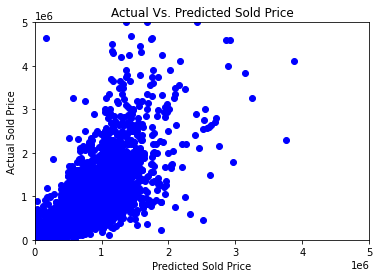

In [196]:
#plt.scatter(y, y, color = 'red')
plt.scatter(res.predict(X), y, color = 'blue')
plt.title('Actual Vs. Predicted Sold Price')
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)
plt.xlabel('Predicted Sold Price')
plt.ylabel('Actual Sold Price')
plt.show()

#plot.scatter(xTrain, yTrain, color = 'red')
#plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
#plot.title('Salary vs Experience (Training set)')
#plot.xlabel('Years of Experience')
#plot.ylabel('Salary')
#plot.show()

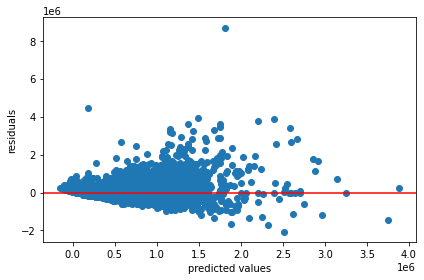

In [197]:
#plot the residuals
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()

In [198]:
X_train, X_test = train_test_split(dfpdForLinearRegressionNoStyle, test_size = 0.2, random_state = 2) # splits the data into two parts with 1:4 ratio
print(X_train.shape)
print(X_test.shape)

(61000, 24)
(15251, 24)


In [199]:
#set the training and testing data
X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice
X = sm.add_constant(X) #add the constant to the model
mod = sm.OLS(y, X, hasconst= True) #create the ordinary least squares model
res = mod.fit() #fit the model
print(res.summary()) #summarize the model

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     5267.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        20:40:59   Log-Likelihood:            -8.2575e+05
No. Observations:               61000   AIC:                         1.652e+06
Df Residuals:                   60981   BIC:                         1.652e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.794e+07   3.64

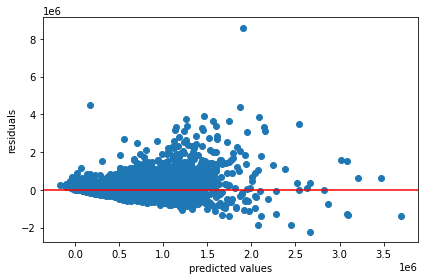

In [200]:
#plot the residuals
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()

In [201]:
# Now try with normalized scaling

x = dfpdForLinearRegressionNoStyle.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfpdForLinearRegressionNoStyleScaled = pd.DataFrame(x_scaled, columns=dfpdForLinearRegressionNoStyle.columns)

In [202]:
X_train, X_test = train_test_split(dfpdForLinearRegressionNoStyleScaled, test_size = 0.2, random_state = 2) # splits the data into two parts with 1:4 ratio
print(X_train.shape)
print(X_test.shape)

(61000, 24)
(15251, 24)


In [203]:
#set the training and testing data
X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice
X = sm.add_constant(X) #add the constant to the model
mod = sm.OLS(y, X, hasconst= True) #create the ordinary least squares model
res = mod.fit() #fit the model
print(res.summary()) #summarize the model

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     5267.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        20:40:59   Log-Likelihood:             1.6326e+05
No. Observations:               61000   AIC:                        -3.265e+05
Df Residuals:                   60981   BIC:                        -3.263e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0038      0

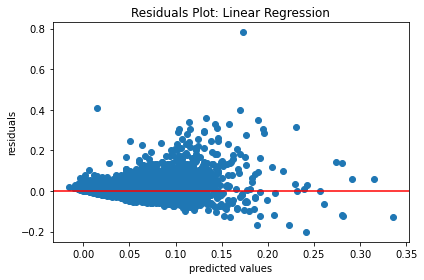

In [204]:
#plot the residuals
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.title('Residuals Plot: Linear Regression')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("../Images/linearRegressionResiduals.png",bbox_inches='tight')

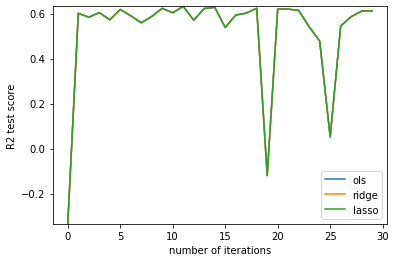

In [205]:

def model_experiment(num_iter = 5, 
                     models = ['ols', 'ridge', 'lasso'], alpha= 10, 
                     complexity = 'simple', degree = 3):
    
    X_train, X_test = train_test_split(dfpdForLinearRegressionNoStyle, test_size = 0.2) # splits the data into two parts with 1:4 ratio
    X = X_train.drop('SoldPrice', axis = 1)
    y = X_train.SoldPrice
    
    x_axis = np.arange(num_iter)
    y_ols_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):
        
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        elif complexity == 'polynomial':
            ## Create higher order terms
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(X)
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)


        ## Standard scale mean = 0, variance = 1
        #sd = StandardScaler()

        #sd.fit(X_train)

        #X_train = sd.transform(X_train)

        #X_test = sd.transform(X_test)

        ## Be careful about the leakage

        ## Vanilla model
        if 'ols' in models:
            lr = LinearRegression()

            lr.fit(X_train, y_train)
            
            sample_models['ols'] = lr

            test_score = lr.score(X_test, y_test)
            train_score = lr.score(X_train, y_train)

            y_ols_test.append(test_score)

    #       print('test score OLS is %.2f and train score is %.2f'%(test_score, train_score))

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = alpha, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))
    #         print('test score Ridge is %.2f and train score is %.2f'%(ridge.score(X_test, y_test),
    #                                                             ridge.score(X_train, y_train)))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = alpha, max_iter= 10000)

            lasso.fit(X_train, y_train)
            
            sample_models['lasso'] = lasso
            
            y_lasso_test.append(lasso.score(X_test, y_test))
    #       print('test score Lasso is %.2f and train score is %.2f'%(lasso.score(X_test, y_test),
    #                                                             lasso.score(X_train, y_train)))

        i+=1
    if 'ols' in models:
        plt.plot(y_ols_test, label = 'ols')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    all_results = y_ols_test + y_lasso_test + y_ridge_test
    plt.ylim((np.min(all_results), np.max(all_results)))
    
    plt.legend()
    plt.savefig("../Images/regressionComparison.png",bbox_inches='tight')
    return sample_models

trained_models = model_experiment(num_iter=30, alpha = 30,
                                   models = ['ols', 'ridge', 'lasso'], 
                                   complexity= 'simple', degree = 3)



In [206]:
# After run model_experiment with complexity == 'polynomial'

lr_ols = trained_models['ols']
lr_lasso = trained_models['lasso']
lr_ridge =trained_models['ridge']

# check the coefficients from Lasso

print(lr_ols.coef_)
print(lr_ridge.coef_)
print(lr_lasso.coef_)

# compare them with OLS/Ridge models.

[ 7.74429895e+01  1.18029766e+02  1.75931790e+04 -4.69442900e+01
  1.56439862e+00  1.53064701e+04  1.36597159e+05  1.09835173e+05
  2.25674040e+03  4.87644785e+04 -5.29581114e+04 -7.00451944e+04
  7.42388273e+04  1.63184141e+02 -1.63184141e+02 -5.97549255e+03
  5.48154102e+04 -9.78472688e+03  9.78472688e+03 -2.13744673e+05
  2.13744673e+05 -4.58748338e+04  4.58748338e+04]
[ 7.74035037e+01  1.18081294e+02  1.75960289e+04 -4.69255444e+01
  1.56821061e+00  1.53686024e+04  1.36584276e+05  1.09640272e+05
  2.26336859e+03  4.88436383e+04 -5.28990664e+04 -6.97864025e+04
  7.38418307e+04  2.17254091e+02 -2.17254091e+02 -6.08082550e+03
  5.47658795e+04 -9.74320033e+03  9.74320033e+03 -2.11711460e+05
  2.11711460e+05 -4.56045423e+04  4.56045423e+04]
[ 7.74526396e+01  1.17917764e+02  1.75883905e+04 -4.69337706e+01
  1.56634053e+00  1.52864814e+04  1.36641263e+05  1.09783130e+05
  2.25843931e+03  6.08477890e+04 -4.07925429e+04 -5.77429142e+04
  8.61221846e+04  4.30466621e+01 -0.00000000e+00 -5.807

In [207]:
X_train, X_test = train_test_split(dfpdForLinearRegressionNoStyle, test_size = 0.2) # splits the data into two parts with 1:4 ratio
X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice

## Create higher order terms
poly = PolynomialFeatures(degree=3)
Xp = poly.fit_transform(X)
## test-train split
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)

(48800, 2600)
(12200, 2600)


In [208]:
#set the training and testing data
lr = LinearRegression()
lr.fit(X_train, y_train)
test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

test_score

0.6613804307184897

Tried here above with polynomial regression but got pretty bad results.

In [209]:
sample = dfpdForLinearRegressionNoStyle.sample(frac=0.1, replace=False, random_state=1)

X_train, X_test = train_test_split(sample, test_size = 0.2, random_state = 2) # splits the data into two parts with 1:4 ratio
print(X_train.shape)
print(X_test.shape)

(6100, 24)
(1525, 24)


In [210]:
pd.set_option('display.max_columns', None)
X_train.head()

,SoldPrice,SettledDate,ZipCode,AcresTotal,Age,InteriorSqFt,Bedrooms,BathsFull,BathsHalf,GarageSpaces,ANNEARUNDELMD,BALTIMOREMD,HARFORDMD,HOWARDMD,NoBasement,HasBasement,NoFireplace,HasFireplace,NoCentralAir,HasCentralAir,NotWaterfront,IsWaterfront,NotNewConstruction,IsNewConstruction
9511,514550,737455,21108,0.00,2020.0,3571.0,4.0,2.0,1.0,3.0,1,0,0,0,0,1,1,0,0,1,1,0,0,1
1609,300000,737854,21206,0.19,1954.0,1492.0,3.0,2.0,0.0,2.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0
29299,292650,736853,21061,0.17,1976.0,1608.0,4.0,2.0,0.0,0.0,1,0,0,0,0,1,0,1,0,1,1,0,1,0
29194,220000,736867,21037,0.24,1968.0,960.0,3.0,1.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
11006,425000,737633,21090,0.23,1976.0,1944.0,4.0,2.0,2.0,1.0,1,0,0,0,0,1,0,1,0,1,1,0,1,0


In [211]:
# Now try SVR
X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice
y = np.asarray(y)
y = y.reshape(-1,1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

regressor = SVR(kernel = 'rbf', C = 100, gamma = .001).fit(X, y)
print(regressor)

score = regressor.score(X, y)
print(score)

#print(X[1])

data = [[738124, 21144, 1.61, 1995.0, 3806.0, 5.0, 2.0, 1.0, 2.0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]]
sc_Xpred = StandardScaler()
Xpred = sc_Xpred.fit_transform(data)
data2 = [[737928, 21784, 6.00, 1996.0, 4428.0, 4.0, 2.0, 1.0, 4.0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]]
sc_Xpred2 = StandardScaler()
Xpred2 = sc_Xpred2.fit_transform(data2)
#data = sc_X.fit_transform(data)


y_pred = regressor.predict(Xpred)
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

y_pred2 = regressor.predict(Xpred2)
y_pred2 = sc_y.inverse_transform(y_pred2)
print(y_pred2)

#Xshaped = np.array(X).reshape(-1,1)
#print(len(X))
#print(len(y))

#plt.scatter(X, y, s=5, color="blue", label="original")
#plt.legend()
#plt.show()

#X_grid = np.arange(np.min(X), np.max(X), 0.01) #this step required because data is feature scaled.
#X_grid = X_grid.reshape((len(X_grid), 1))
#plt.scatter(X, y, color = 'red')
#plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
#plt.title('Truth or Bluff (SVR)')
#plt.xlabel('Position level')
#plt.ylabel('Salary')
#plt.show()


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100, gamma=0.001)
0.7356147972439364
[418519.02094328]
[418519.02094328]


[[ 514550.]
 [ 300000.]
 [ 292650.]
 ...
 [ 600000.]
 [ 300000.]
 [1094000.]]
[ 650512.25453872  314126.07933187  303780.53550339 ...  622271.06381872
  322160.30943237 1365127.95346773]


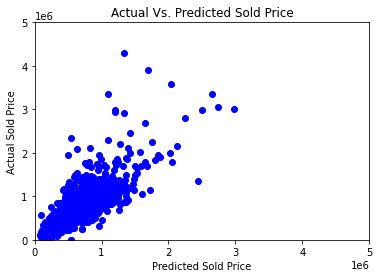

In [212]:
print(sc_y.inverse_transform(y))
print(sc_y.inverse_transform(regressor.predict(X)))

plt.scatter(sc_y.inverse_transform(regressor.predict(X)), sc_y.inverse_transform(y), color = 'blue')
plt.title('Actual Vs. Predicted Sold Price')
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)
plt.xlabel('Predicted Sold Price')
plt.ylabel('Actual Sold Price')
plt.show()

(6100,)
(6100,)
[ 650512.25453872  314126.07933187  303780.53550339 ...  622271.06381872
  322160.30943237 1365127.95346773]
6100


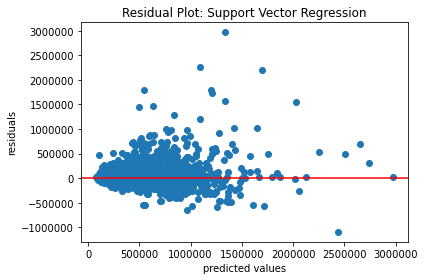

In [214]:
actualPrices = sc_y.inverse_transform(y)
actualPrices2 = np.reshape(actualPrices, (6100,))
print(actualPrices2.shape)
predictedPrices = np.reshape(sc_y.inverse_transform(regressor.predict(X)), (6100,))
print(predictedPrices.shape)
#print(actualPrices2)
print(predictedPrices)
residuals = []
for item1, item2 in zip(actualPrices2.tolist(), predictedPrices.tolist()):
    residuals.append(item1 - item2)
#rediduals = actualPrices2 - predictedPrices
#print(residuals.shape)
print(len(residuals))
#print(residuals)
plt.scatter(predictedPrices, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Residual Plot: Support Vector Regression')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()
plt.savefig("../Images/svrResiduals.png",bbox_inches='tight')

In [83]:

grid = {
    "kernel": ["rbf", "poly"],
    "C": [1,10,10,100,1000],
    "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

X = X_train.drop('SoldPrice', axis = 1)
y = X_train.SoldPrice
y = np.asarray(y)
y = y.reshape(-1,1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

regressor = SVR()

grid_search_cv = GridSearchCV(estimator = regressor, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X, y)
grid_search_cv.cv_results_


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=poly ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-p

[CV] .................... C=1, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-08, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-07, kernel=rbf ....................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=1, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-07, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-07, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=rbf ....................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=1, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ..................... C=1, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ..................... C=1, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=poly ...................................
[CV] .................... C=1, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV] ................... C=1, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV] ................... C=1, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV] ................... C=1, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=10, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=10, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=poly ..................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=10, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=10, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=10, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=10, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................. C=10, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV] .................. C=10, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV] .................. C=10, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV] .................. C=10, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV] .................. C=10, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, gamma=0.1, kernel=poly ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.5s
[CV] C=10, gamma=0.1, kernel=poly ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=10, gamma=0.1, kernel=poly ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=10, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=10, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-08, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=10, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-07, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=10, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-06, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=10, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-06, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=10, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] .................... C=10, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=10, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=10, gamma=1e-05, kernel=poly ..................................
[CV] ................... C=10, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................. C=10, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV] .................. C=10, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.1, kernel=poly ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=10, gamma=0.1, kernel=poly ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=10, gamma=0.1, kernel=poly ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, gamma=0.1, kernel=poly ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=100, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=poly .................................
[CV] .................. C=100, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=poly .................................
[CV] .................. C=100, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=poly .................................
[CV] .................. C=100, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-08, kernel=poly .................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=100, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-07, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-07, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-07, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-07, kernel=poly .................................
[CV] .................. C=100, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-07, kernel=poly .................................
[CV] .................. C=100, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-07, kernel=poly .................................
[CV] .................. C=100, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-07, kernel=poly .................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=100, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-06, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-06, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-06, kernel=poly .................................
[CV] .................. C=100, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-06, kernel=poly .................................
[CV] .................. C=100, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-06, kernel=poly .................................
[CV] .................. C=100, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-06, kernel=poly .................................
[CV] .................. C=100, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-06, kernel=poly .................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=100, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=poly .................................
[CV] .................. C=100, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=poly .................................
[CV] .................. C=100, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=poly .................................
[CV] .................. C=100, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=poly .................................
[CV] .................. C=100, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=poly .................................
[CV] .................. C=100, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV] ................. C=100, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV] ................. C=100, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV] ................. C=100, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV] ................. C=100, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV] ................. C=100, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=100, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.1, kernel=poly ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=100, gamma=0.1, kernel=poly ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=100, gamma=0.1, kernel=poly ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.6s
[CV] C=100, gamma=0.1, kernel=poly ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.7s
[CV] C=100, gamma=0.1, kernel=poly ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.5s
[CV] C=1000, gamma=1e-08, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-08, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-08, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-08, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-08, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................. C=1000, gamma=1e-08, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-08, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-08, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-08, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-08, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-08, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-08, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................. C=1000, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=poly ................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................. C=1000, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-07, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................. C=1000, gamma=1e-06, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-06, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-06, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................. C=1000, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................
[CV] .................. C=1000, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=poly ................................
[CV] ................. C=1000, gamma=1e-05, kernel=poly, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=poly ................................
[CV] .

/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ................ C=1000, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................ C=1000, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ................ C=1000, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ................ C=1000, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ................ C=1000, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] ................. C=1000, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] ................. C=1000, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] ................. C=1000, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] ................. C=1000, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] ................. C=1000, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.8s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] .................. C=1000, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] .................. C=1000, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] .................. C=1000, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] .................. C=1000, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................. C=1000, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1000, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=1000, gamma=0.1, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1000, gamma=0.1, kernel=poly, total=   0.5s
[CV] C=1000, gamma=0.1, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1000, gamma=0.1, kernel=poly, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1000, gamma=0.1, kernel=poly, total=   0.8s
[CV] C=1000, gamma=0.1, kernel=poly ..................................


/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=1000, gamma=0.1, kernel=poly, total=   0.5s


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   26.3s finished
/Users/ZachV/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'mean_fit_time': array([0.01559925, 0.01092262, 0.01244574, 0.00894423, 0.01670256,
        0.01340017, 0.01859298, 0.01111155, 0.01456957, 0.00949898,
        0.01189528, 0.00860424, 0.01332474, 0.01213837, 0.02739787,
        0.07879696, 0.02139993, 0.02071843, 0.02414427, 0.01295972,
        0.0212007 , 0.01898246, 0.0220408 , 0.02081885, 0.02157512,
        0.024225  , 0.02920489, 0.02068968, 0.04833961, 0.01584287,
        0.03088284, 0.28074284, 0.03257155, 0.02490916, 0.03109117,
        0.02752404, 0.0272831 , 0.0220674 , 0.0160624 , 0.02174807,
        0.01070223, 0.00931616, 0.0142241 , 0.01104054, 0.04581776,
        0.02395439, 0.0450253 , 0.27587266, 0.01450543, 0.0087657 ,
        0.01196785, 0.00853281, 0.01152024, 0.00882339, 0.01017909,
        0.00966134, 0.01619   , 0.00941353, 0.02441034, 0.00913777,
        0.13317142, 0.03574409, 0.0827868 , 0.51299362, 0.02388349,
        0.01561799, 0.01983209, 0.01694822, 0.02073555, 0.01464262,
        0.02419953, 0.00981388,

In [84]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,58,44,28,72,12,26,42,56,70,74,68,54,40,24,10,60,45,29,46,30,14,61,62,78,76,13,75,66,52,22,38,8,59,64,20,36,50,6,27,43,48,34,18,4,11,73,16,32,2,15,77,57,0,41,25,71,9,55,23,39,7,69,53,37,21,5,67,51,35,19,65,3,49,1,17,33,31,47,63,79
mean_fit_time,0.0244103,0.0458178,0.0483396,0.030206,0.0133247,0.0292049,0.0142241,0.01619,0.0241995,0.221231,0.0207355,0.0101791,0.0107022,0.0215751,0.0118953,0.133171,0.0239544,0.0158429,0.0450253,0.0308828,0.0273979,0.0357441,0.0827868,0.0377906,0.502411,0.0121384,0.0160852,0.0198321,0.0115202,0.0220408,0.0160624,0.0145696,0.00913777,0.0238835,0.0212007,0.0272831,0.0119678,0.018593,0.0206897,0.0110405,0.0145054,0.0310912,0.0241443,0.0167026,0.00860424,0.0185493,0.0213999,0.0325716,0.0124457,0.078797,0.0368963,0.00941353,0.0155993,0.00931616,0.024225,0.00981388,0.00949898,0.00966134,0.0208189,0.0217481,0.0111115,0.0146426,0.00882339,0.0220674,0.0189825,0.0134002,0.0169482,0.00853281,0.027524,0.0129597,0.015618,0.00894423,0.0087657,0.0109226,0.0207184,0.0249092,0.280743,0.275873,0.512994,0.620296
std_fit_time,0.00199587,0.00530144,0.00568788,0.00399539,0.00198953,0.0109811,0.000946084,0.000694317,0.00643547,0.0262668,0.00696305,0.000925034,0.0023864,0.00444165,0.00205233,0.064505,0.00313256,0.00413705,0.00747964,0.00558554,0.005554,0.0101529,0.0204823,0.00661258,0.156675,0.00324612,0.00106594,0.0021651,0.000874156,0.00427522,0.00255081,0.00259304,0.000543147,0.00519675,0.00278245,0.00812477,0.000759772,0.0087004,0.00447575,0.0032653,0.00305371,0.00688049,0.00624184,0.00224967,0.000182091,0.0016399,0.00434744,0.00870401,0.00144901,0.0157642,0.00390245,0.000989898,0.0049902,0.000979346,0.00806805,0.00174013,0.00118055,0.0013405,0.00265354,0.00712397,0.00113538,0.000943859,0.000239053,0.00500108,0.00303913,0.0023538,0.00175601,0.000307311,0.00475928,0.0037289,0.00256799,0.00100437,0.000227297,0.00251205,0.00228721,0.0095417,0.102452,0.0801648,0.126405,0.184337
mean_score_time,0.00217381,0.00484419,0.00550413,0.00245957,0.00202169,0.00564561,0.00203724,0.00206442,0.00237894,0.00300126,0.00382667,0.00191689,0.00195379,0.00671477,0.00208397,0.00359774,0.00329905,0.00232668,0.00456495,0.00241857,0.00467076,0.0023859,0.00586147,0.00208931,0.00219622,0.002139,0.00314798,0.00272293,0.00234451,0.00393763,0.00310073,0.00371199,0.001682,0.00514655,0.00367508,0.0052434,0.00252662,0.00384164,0.0052773,0.00237026,0.00299258,0.00642266,0.00452676,0.00380349,0.00162153,0.00524173,0.00532994,0.00658307,0.00249085,0.00181007,0.00156126,0.00173917,0.00372028,0.00174618,0.0034677,0.0016223,0.00168285,0.00211902,0.0037468,0.0028317,0.00291424,0.00329132,0.00166922,0.00321503,0.00458407,0.00284572,0.00246038,0.00169711,0.00583396,0.00396256,0.00421405,0.00166492,0.00182614,0.00254335,0.00389619,0.00384159,0.00431318,0.00211086,0.00210228,0.00184264
std_score_time,0.000541315,0.00347988,0.00330465,0.000583985,0.000239003,0.00321827,0.000273191,0.000237852,0.000778393,0.000854873,0.00184618,4.61437e-05,0.000136191,0.00485947,0.000412246,0.00150139,0.00139897,0.000414032,0.00211113,0.000118936,0.00219814,0.000462036,0.00396391,0.000109848,0.000134885,0.00049341,0.00154273,0.000494033,0.000388458,0.00175039,0.000422163,0.00249406,6.18584e-05,0.00213077,0.00108314,0.00256526,0.000377339,0.00167107,0.00299151,0.000971896,0.000783497,0.00325829,0.00192501,0.00192591,3.15947e-05,0.00322616,0.00190058,0.0035396,0.000580529,0.000227448,6.08431e-05,0.000185636,0.00162344,0.000107926,0.00136615,4.63506e-05,6.13237e-05,0.000465749,0.00163534,0.00101608,0.00166021,0.00198316,4.80867e-05,0.00100995,0.00158298,0.000573448,0.000937148,2.93986e-05,0.00243674,0.0026964,0.00289348,9.85187e-05,0.000109903,0.000997073,0.00197418,0.00240142,0.00308807,0.000721526,0.000491628,0.000258118
param_C,100,10,10,1000,1,10,10,100,1000,1000,1000,100,10,10,1,100,10,10,10,10,1,100,100,1000,1000,1,1000,1000,100,10,10,1,100,1000,10,10,100,1,10,10,100,10,10,1,1,1000,10,10,1,1,1000,100,1,10,10,1000,1,100,10,10,1,1000,100,10,10,1,1000,100,10,10,1000,1,100,1,10,1

In [85]:
# Now for Decision trees

#from the lecture notes...
def draw_tree(estimator, figsize =(15, 5), feature_names = ["Hits", "Years"]):
    """
    Takes a decision  tree estimator and plots it's tree structure
    :param estimator: A sklearn decision tree estimator. Should be fitted.
    :param figsize: tuple. (int, int).
    :param feature_names:
    :return: It returns a plot. The image is not saved.
    """
    fig = plt.figure(figsize= figsize)
    _ = tree.plot_tree(estimator,
                       feature_names= feature_names,
                       filled=True)

In [86]:
dfpdForDecisionTree = dfCache.toPandas()

In [87]:
dfpdForDecisionTree.head()

,index,MLSNumber,DOM,CDOM,ListDate,AgreementOfSaleSignedLeaseDate,OffMarketDate,SettledDate,OriginalPrice,ListPrice,SoldPrice,StreetNumber,StreetDirection,StreetName,UnitNumber,City,ZipCode,County,Subdivision,ListAgentName,ListAgentCode,ListOfficeName,ListOfficeCode,SellingAgent,SellingAgentCode,SellingOfficeName,SellingOfficeCode,SellerConcessionsAmount,FinalFinancing,FinalShortSale,FinalThirdPartyApproval,FinalBankOwned,TaxAnnualTotal,TaxYear,AcresTotal,LandUseCode,Ownership,SeniorCommunity,CondoCoopAssoc,HOA,OneTimeAssociationFee,AssociationFee,AssociationFeeFrequency,Age,InteriorSqFt,PropertyCondition,Bedrooms,BathsFull,BathsHalf,Design,Style,NumberofStories,FloorNumber,Basement,GarageSpaces,Fireplace,Laundry,OtherRooms,RoomCount,CentralAir,Waterfront,NewConstruction,ModelName,BuyerBrokerCompensation,SubAgentCompensation,TransactionBrokerCompensation,OriginatingMLS,AboveGradeSqFt,BelowGradeSqFt,HomeBuilt,BasementFootprintPct,BasementFinishedPct
0,0,MDBC2022914,0,0,1/14/22,5/10/21 0:00,1/14/22,6/11/21,275000.0,275000,275000,2405.0,None,Stonewall,NaN,Baltimore,21228,BALTIMOREMD,NONE AVAILABLE,Non Member,12345,Non Subscribing Office,NON1,Rachel B Sturm,103717.0,Keller Williams Realty Centre,KWR15,NaN,Conventional,StandardSale,StandardSale,StandardSale,3809.0,2020.0,0.49,10.0,FeeSimple,No,No,No,None,NaN,None,1961.0,2532.0,None,3.0,2.0,NaN,Two,Rancher,Main,None,Yes,NaN,None,None,None,NaN,Yes,No,No,None,2.50,0.00,NaN,BRIGHT,1316.0,1216.0,None,NaN,NaN
1,1,MDBC2021930,0,0,1/7/22,3/25/21 0:00,1/7/22,4/23/21,410000.0,410000,410000,2810.0,None,Wells,NaN,Baltimore,21219,BALTIMOREMD,EDGEMERE/SPARROWS POINT,Non Member,12345,Non Subscribing Office,NON1,Christa R Barkley,25193.0,RE/MAX First Choice,RXFC1,NaN,Conventional,StandardSale,StandardSale,StandardSale,2066.0,2020.0,0.17,10.0,FeeSimple,No,No,No,None,NaN,None,1942.0,1089.0,Excellent,4.0,2.0,NaN,Two,Colonial,Main,None,No,NaN,None,None,None,NaN,Yes,No,Yes,None,2.25,2.25,NaN,BRIGHT,1089.0,0.0,Excellent,NaN,NaN
2,2,MDBC2021520,0,206,1/4/22,1/4/22 0:00,1/4/22,2/26/21,737724.0,737724,737724,607.0,None,Somerstown,NaN,Middle River,21220,BALTIMOREMD,GREENLEIGH AT CROSSROADS,Non Member,12345,Non Subscribing Office,NON1,Charlie Hatter,3090060.0,Monument Sotheby's International Realty,MONUM1,10000.0,Conventional,StandardSale,StandardSale,StandardSale,0.0,2021.0,0.17,NaN,FeeSimple,No,No,Yes,Monthly,105.0,Monthly,2022.0,4254.0,Excellent,5.0,4.0,1.0,Three,Traditional,"Lower1,Main,Upper1",None,Yes,2.0,Yes,"Hookup,UpprFlrLndry",None,NaN,Yes,No,Yes,MOUNT VERNON,2.00,2.00,NaN,BRIGHT,3282.0,972.0,Excellent,NaN,NaN
3,3,MDBC2021428,0,51,1/4/22,3/12/21 0:00,1/4/22,4/27/21,117800.0,117800,117800,1325.0,None,Old Eastern,NaN,Baltimore,21221,BALTIMOREMD,EDGEWOOD PARK,Non Member,12345,Non Subscribing Office,NON1,Adetoun Olunlade,3013617.0,Samson Properties,SAMP16,NaN,Other,BankOwnedREO,BankOwnedREO,BankOwnedREO,2593.0,2020.0,0.17,10.0,FeeSimple,No,No,No,None,NaN,None,1939.0,1453.0,None,4.0,2.0,1.0,Three,CapeCod,"Lower1,Main,Upper1",None,Yes,1.0,None,None,None,NaN,Yes,No,No,None,1.50,0.00,NaN,BRIGHT,1453.0,0.0,None,NaN,NaN
4,4,MDBC2012350,0,68,9/23/21,4/1/21 0:00,9/23/21,5/26/21,1097700.0,1097700,1097700,9.0,None,Crestline,NaN,Owings Mills,21117,BALTIMOREMD,GREENSPRING VALLEY,Non Member,12345,Non Subscribing Office,NON1,Stephen F Edelen,26426.0,"Long & Foster Real Estate, Inc.",LNG106,NaN,Cash,StandardSale,StandardSale,StandardSale,8290.0,2021.0,3.79,10.0,FeeSimple,No,No,No,None,NaN,None,1967.0,3480.0,None,5.0,4.0,1.0,Two,Colonial,"Main,Upper1",None,Yes,3.0,Yes,MainFlrLndry,None,NaN,Yes,No,No,None,2.50,0.00,NaN,BRIGHT,3480.0,0.0,None,NaN,NaN


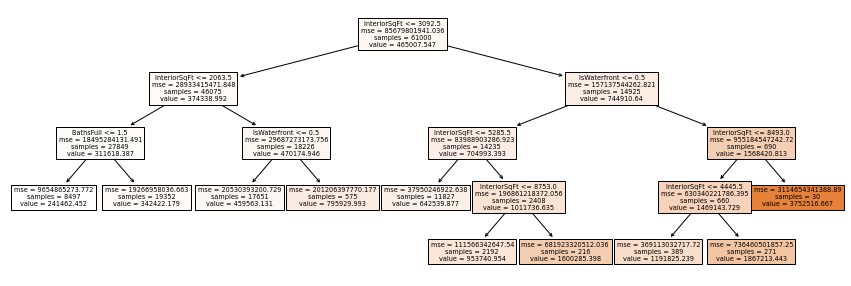

In [110]:
#X = dfpdForDecisionTree.drop(['index', 'MLSNumber', 'DOM', 'CDOM', 'AgreementOfSaleSignedLeaseDate', 'OriginalPrice', 'ListPrice', 'UnitNumber', 'ListAgentName', 'ListAgentCode', 'ListOfficeName', 'ListOfficeCode','SellingAgent', 'SellingAgentCode', 'SellingOfficeName', 'SellingOfficeCode', 'SellerConcessionsAmount', 'LandUseCode', 'Ownership', 'BasementFootprintPct', 'BasementFinishedPct', 'OriginatingMLS'], axis=1)
X = dfpdForLinearRegression.drop(['SoldPrice'], axis=1)
y = dfpdForLinearRegression['SoldPrice']
#y = dfpdForDecisionTree['SoldPrice']
#print(X.head(2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

regressor = DecisionTreeRegressor(max_leaf_nodes= 10)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

draw_tree(regressor,feature_names= X_train.columns)


In [107]:
#Grid Search CV
#now lets try to find the best parameters for decision trees
#this takes a pretty long time to run, so gave faster option below
dt = DecisionTreeRegressor(max_leaf_nodes= 300)
#grid = {'n_estimators': [50,300,500,700], 'max_leaf_nodes': [5, 15, 25, 100], 'ccp_alpha': [0, 0.01, 0.1, 1, 10], 'criterion' : ['gini', 'entropy'], "min_impurity_split":[0,0.1,0.3,0.5], "n_jobs": [4]}
grid = {'max_depth': [15, 100], 'ccp_alpha': [0, 0.1], "min_impurity_decrease":[0,0.1,0.5]}
grid_search_cv = GridSearchCV(estimator = dt, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.cv_results_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0, total=   3.5s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0, total=   3.2s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0 ..............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0, total=   3.5s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0 ..............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0, total=   3.2s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0 ..............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0, total=   3.7s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1 ............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1, total=   3.2s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1 ............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1, total=   3.2s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1 ............
[CV]  ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1, total=   3.2s
[CV] ccp_alpha=0, max_depth=15, min_impurity_decrease=0.1 ......

[CV]  ccp_alpha=0.1, max_depth=100, min_impurity_decrease=0.5, total=   4.4s
[CV] ccp_alpha=0.1, max_depth=100, min_impurity_decrease=0.5 .........
[CV]  ccp_alpha=0.1, max_depth=100, min_impurity_decrease=0.5, total=   3.4s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.1min finished


{'mean_fit_time': array([3.37432127, 3.14748573, 3.25712247, 3.16290932, 3.21338582,
        3.4446312 , 4.19137979, 3.93824401, 3.89957976, 3.78647423,
        4.20914063, 4.8855134 ]),
 'std_fit_time': array([0.17724843, 0.02603893, 0.14519967, 0.03361578, 0.0802968 ,
        0.42955183, 0.3389276 , 0.52202993, 0.82802583, 0.63343007,
        0.77128674, 1.35411177]),
 'mean_score_time': array([0.06055155, 0.05194845, 0.05257783, 0.05217395, 0.05306749,
        0.05335355, 0.06955819, 0.05949669, 0.0629024 , 0.05311255,
        0.08197436, 0.07404566]),
 'std_score_time': array([0.01329005, 0.00069695, 0.00145225, 0.00038427, 0.00041501,
        0.00054646, 0.02088521, 0.00758964, 0.01724709, 0.00081396,
        0.04307133, 0.01849769]),
 'param_ccp_alpha': masked_array(data=[0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             

In [108]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,0,7,11,5,2,3,6,9,1,4,8,10
mean_fit_time,3.37432,3.93824,4.88551,3.44463,3.25712,3.16291,4.19138,3.78647,3.14749,3.21339,3.89958,4.20914
std_fit_time,0.177248,0.52203,1.35411,0.429552,0.1452,0.0336158,0.338928,0.63343,0.0260389,0.0802968,0.828026,0.771287
mean_score_time,0.0605515,0.0594967,0.0740457,0.0533535,0.0525778,0.0521739,0.0695582,0.0531126,0.0519485,0.0530675,0.0629024,0.0819744
std_score_time,0.0132901,0.00758964,0.0184977,0.000546459,0.00145225,0.000384273,0.0208852,0.000813958,0.000696951,0.000415007,0.0172471,0.0430713
param_ccp_alpha,0,0.1,0.1,0,0,0,0.1,0.1,0,0,0.1,0.1
param_max_depth,15,15,100,100,15,100,15,100,15,100,15,100
param_min_impurity_decrease,0,0.1,0.5,0.5,0.5,0,0,0,0.1,0.1,0.5,0.1
params,"{'ccp_alpha': 0, 'max_depth': 15, 'min_impurit...","{'ccp_alpha': 0.1, 'max_depth': 15, 'min_impur...","{'ccp_alpha': 0.1, 'max_depth': 100, 'min_impu...","{'ccp_alpha': 0, 'max_depth': 100, 'min_impuri...","{'ccp_alpha': 0, 'max_depth': 15, 'min_impurit...","{'ccp_alpha': 0, 'max_depth': 100, 'min_impuri...","{'ccp_alpha': 0.1, 'max_depth': 15, 'min_impur...","{'ccp_alpha': 0.1, 'max_depth': 100, 'min_impu...","{'ccp_alpha': 0, 'max_depth': 15, 'min_impurit...","{'ccp_alpha': 0, 'max_depth': 100, 'min_impuri...","{'ccp_alpha': 0.1, 'max_depth': 15, 'min_impur...","{'ccp_alpha': 0.1, 'max_depth': 100, 'min_impu..."
split0_test_score,0.715304,0.688733,0.685934,0.703497,0.658905,0.672128,0.656501,0.668366,0.708939,0.665498,0.678549,0.689284
split1_test_score,0.595963,0.590067,0.597946,0.603472,0.601762,0.562949,0.633817,0.642997,0.647486,0.59331,0.601104,0.592858


In [103]:
r2_score(y_test, y_pred)


0.6206040820079577

In [182]:
sample = dfpdForLinearRegressionNoStyle.sample(frac=0.1, replace=False, random_state=1)
X = sample.drop(['SoldPrice'], axis=1)
y = sample['SoldPrice']
#y = dfpdForDecisionTree['SoldPrice']
#print(X.head(2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# define model
model = XGBRegressor()
# fit model
model.fit(X, y)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

#print(scores.mean())
#print(scores.std())


0.9760031281415894

In [161]:
filename = '../Models/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [162]:
loaded_model = pickle.load(open(filename, 'rb'))

In [155]:
X_test.head()

,SettledDate,ZipCode,AcresTotal,Age,InteriorSqFt,Bedrooms,BathsFull,BathsHalf,GarageSpaces,ANNEARUNDELMD,BALTIMOREMD,HARFORDMD,HOWARDMD,NoBasement,HasBasement,NoFireplace,HasFireplace,NoCentralAir,HasCentralAir,NotWaterfront,IsWaterfront,NotNewConstruction,IsNewConstruction
63484,736653,21009,0.38,1993.0,3172.0,4.0,3.0,1.0,2.0,0,0,1,0,0,1,1,0,0,1,1,0,1,0
13321,737502,21032,0.31,1987.0,909.0,2.0,1.0,0.0,0.0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
69463,738195,21154,9.44,1981.0,2540.0,4.0,3.0,0.0,2.0,0,0,1,0,0,1,0,1,0,1,1,0,1,0
27823,737090,21409,0.25,2018.0,2996.0,4.0,2.0,1.0,2.0,1,0,0,0,0,1,0,1,0,1,1,0,0,1
6494,737347,21114,0.19,1994.0,2308.0,4.0,2.0,1.0,2.0,1,0,0,0,0,1,0,1,0,1,1,0,1,0


In [163]:
#print(X_test)
data = asarray([[738124, 21144, 1.61, 1995.0, 3806.0, 5.0, 2.0, 1.0, 2.0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]])
data2 = asarray([[737928, 21784, 6.00, 1996.0, 4428.0, 4.0, 2.0, 1.0, 4.0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]])
pred = loaded_model.predict(data2)
pred

array([803012.8], dtype=float32)

(1525,)
(1525,)
[361896.78 522698.5  591435.75 ... 449284.78 676837.   670505.75]
1525


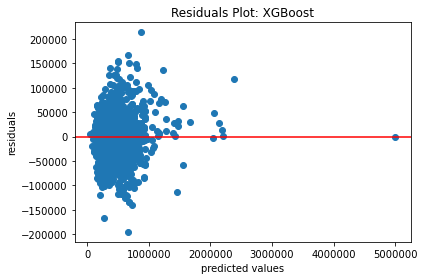

In [184]:
actualPrices = y_test
predictedPrices = y_pred
#actualPrices2 = np.reshape(actualPrices, (610,))
print(actualPrices.shape)
#predictedPrices = np.reshape(sc_y.inverse_transform(regressor.predict(X)), (610,))
print(predictedPrices.shape)
#print(actualPrices2)
print(predictedPrices)
residuals = []
for item1, item2 in zip(actualPrices.tolist(), predictedPrices.tolist()):
    residuals.append(item1 - item2)
#rediduals = actualPrices - predictedPrices
#print(residuals.shape)
print(len(residuals))
#print(residuals)
plt.scatter(predictedPrices, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.title('Residuals Plot: XGBoost')
plt.tight_layout()
plt.savefig("../Images/xgBoostResiduals.png",bbox_inches='tight')

In [127]:
scores

array([0.72789415, 0.79646951, 0.78322253, 0.66847488, 0.81708377,
       0.64730498, 0.83206918, 0.74545147, 0.74528407, 0.65285402,
       0.82182906, 0.82573398, 0.71005051, 0.67008886, 0.74246874,
       0.74166955, 0.79234545, 0.79830372, 0.68066537, 0.81018177,
       0.69741091, 0.82411455, 0.75275527, 0.74636393, 0.70789594,
       0.76774402, 0.80859486, 0.81228216, 0.76080524, 0.70005627])

In [124]:
#Grid Search CV
#now lets try to find the best parameters for decision trees
#this takes a pretty long time to run, so gave faster option below
sample = dfpdForLinearRegression.sample(frac=0.01, replace=False, random_state=1)
X = sample.drop(['SoldPrice'], axis=1)
y = sample['SoldPrice']
#y = dfpdForDecisionTree['SoldPrice']
#print(X.head(2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

model = XGBRegressor()
#grid = {'n_estimators': [50,300,500,700], 'max_leaf_nodes': [5, 15, 25, 100], 'ccp_alpha': [0, 0.01, 0.1, 1, 10], 'criterion' : ['gini', 'entropy'], "min_impurity_split":[0,0.1,0.3,0.5], "n_jobs": [4]}
grid = {'booster': ['gbtree', 'gblinear', 'dart'], 'eta': [0.1, 0.3, 0.5], "max_depth":[3, 6, 9]}
grid_search_cv = GridSearchCV(estimator = model, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.cv_results_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] booster=gbtree, eta=0.1, max_depth=3 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. booster=gbtree, eta=0.1, max_depth=3, total=   1.5s
[CV] booster=gbtree, eta=0.1, max_depth=3 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............. booster=gbtree, eta=0.1, max_depth=3, total=   1.7s
[CV] booster=gbtree, eta=0.1, max_depth=3 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=3, total=   1.3s
[CV] booster=gbtree, eta=0.1, max_depth=3 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=3, total=   1.6s
[CV] booster=gbtree, eta=0.1, max_depth=3 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=3, total=   2.9s
[CV] booster=gbtree, eta=0.1, max_depth=6 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=6, total=   3.2s
[CV] booster=gbtree, eta=0.1, max_depth=6 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=6, total=   3.5s
[CV] booster=gbtree, eta=0.1, max_depth=6 ............................
[CV] ............. booster=gbtree, eta=0.1, max_depth=6, total=   3.2s
[CV] booster=gbtree, eta=0.1, max_depth=6 ............................
[CV] .

[CV] ........... booster=gblinear, eta=0.1, max_depth=3, total=   0.5s
[CV] booster=gblinear, eta=0.1, max_depth=3 ..........................
[21:57:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ........... booster=gblinear, eta=0.1, max_depth=3, total=   0.5s
[CV] booster=gblinear, eta=0.1, max_depth=6 ..........................
[21:57:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

[CV] ........... booster=gblinear, eta=0.3, max_depth=3, total=   0.5s
[CV] booster=gblinear, eta=0.3, max_depth=3 ..........................
[21:57:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ........... booster=gblinear, eta=0.3, max_depth=3, total=   0.5s
[CV] booster=gblinear, eta=0.3, max_depth=3 ..........................
[21:57:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

[CV] ........... booster=gblinear, eta=0.5, max_depth=3, total=   0.5s
[CV] booster=gblinear, eta=0.5, max_depth=3 ..........................
[21:57:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ........... booster=gblinear, eta=0.5, max_depth=3, total=   0.6s
[CV] booster=gblinear, eta=0.5, max_depth=3 ..........................
[21:57:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

[CV] ............... booster=dart, eta=0.1, max_depth=3, total=   6.3s
[CV] booster=dart, eta=0.1, max_depth=3 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=3, total=   6.9s
[CV] booster=dart, eta=0.1, max_depth=6 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=6, total=   9.4s
[CV] booster=dart, eta=0.1, max_depth=6 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=6, total=   5.6s
[CV] booster=dart, eta=0.1, max_depth=6 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=6, total=   5.5s
[CV] booster=dart, eta=0.1, max_depth=6 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=6, total=   5.6s
[CV] booster=dart, eta=0.1, max_depth=6 ..............................
[CV] ............... booster=dart, eta=0.1, max_depth=6, total=   5.6s
[CV] booster=dart, eta=0.1, max_depth=9 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  7.4min finished


{'mean_fit_time': array([1.77927341, 3.05423899, 5.21527419, 2.37384133, 2.2018405 ,
        2.33740382, 1.082091  , 1.69360714, 3.42852726, 0.43018994,
        0.48235688, 0.50257535, 0.485712  , 0.49552336, 0.49381409,
        0.50098324, 0.5009923 , 0.52896886, 5.04808798, 6.01168261,
        6.12181668, 4.50238037, 6.7622592 , 5.75355191, 4.38592463,
        4.93230348, 5.71629071]),
 'std_fit_time': array([0.57896674, 0.52373237, 1.30252747, 0.47341682, 0.62709308,
        0.17527939, 0.04924335, 0.09343235, 1.38746154, 0.04073115,
        0.01986129, 0.00773961, 0.01560711, 0.00834877, 0.00759194,
        0.00678189, 0.00539736, 0.05161715, 0.84851709, 1.53461208,
        0.45277657, 0.08735878, 1.47166189, 0.19213958, 0.04913504,
        0.07949223, 0.14810061]),
 'mean_score_time': array([0.0372282 , 0.04096465, 0.04461837, 0.04605217, 0.03176513,
        0.0325922 , 0.03271575, 0.03081164, 0.03277693, 0.03729005,
        0.04076753, 0.04141335, 0.03635058, 0.03742127, 0.039691

In [125]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,0,18,24,6,3,21,12,14,13,16,15,17,9,11,10,4,22,25,7,1,19,26,8,5,23,20,2
mean_fit_time,1.77927,5.04809,4.38592,1.08209,2.37384,4.50238,0.485712,0.493814,0.495523,0.500992,0.500983,0.528969,0.43019,0.502575,0.482357,2.20184,6.76226,4.9323,1.69361,3.05424,6.01168,5.71629,3.42853,2.3374,5.75355,6.12182,5.21527
std_fit_time,0.578967,0.848517,0.049135,0.0492433,0.473417,0.0873588,0.0156071,0.00759194,0.00834877,0.00539736,0.00678189,0.0516172,0.0407312,0.00773961,0.0198613,0.627093,1.47166,0.0794922,0.0934324,0.523732,1.53461,0.148101,1.38746,0.175279,0.19214,0.452777,1.30253
mean_score_time,0.0372282,0.389202,0.296276,0.0327157,0.0460522,0.314742,0.0363506,0.0396918,0.0374213,0.0422152,0.0403194,0.0389235,0.03729,0.0414134,0.0407675,0.0317651,0.468136,0.285482,0.0308116,0.0409647,0.332416,0.284697,0.0327769,0.0325922,0.288041,0.326501,0.0446184
std_score_time,0.0107762,0.184764,0.0109961,0.0040801,0.00523978,0.0122553,0.00562707,0.00688606,0.00548295,0.00589135,0.00477391,0.0060827,0.00309194,0.00247902,0.0058371,0.0054471,0.12183,0.01865,0.00431828,0.00668034,0.0129538,0.0181049,0.00720121,0.00522442,0.010243,0.00232989,0.0073479
param_booster,gbtree,dart,dart,gbtree,gbtree,dart,gblinear,gblinear,gblinear,gblinear,gblinear,gblinear,gblinear,gblinear,gblinear,gbtree,dart,dart,gbtree,gbtree,dart,dart,gbtree,gbtree,dart,dart,gbtree
param_eta,0.1,0.1,0.5,0.5,0.3,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.1,0.1,0.1,0.3,0.3,0.5,0.5,0.1,0.1,0.5,0.5,0.3,0.3,0.1,0.1
param_max_depth,3,3,3,3,3,3,3,9,6,6,3,9,3,9,6,6,6,6,6,6,6,9,9,9,9,9,9
params,"{'booster': 'gbtree', 'eta': 0.1, 'max_depth': 3}","{'booster': 'dart', 'eta': 0.1, 'max_depth': 3}","{'booster': 'dart', 'eta': 0.5, 'max_depth': 3}","{'booster': 'gbtree', 'eta': 0.5, 'max_depth': 3}","{'booster': 'gbtree', 'eta': 0.3, 'max_depth': 3}","{'booster': 'dart', 'eta': 0.3, 'max_depth': 3}","{'booster': 'gblinear', 'eta': 0.3, 'max_depth...","{'booster': 'gblinear', 'eta': 0.3, 'max_depth...","{'booster': 'gblinear', 'eta': 0.3, 'max_depth...","{'booster': 'gblinear', 'eta': 0.5, 'max_depth...","{'booster': 'gblinear', 'eta': 0.5, 'max_depth...","{'booster': 'gblinear', 'eta': 0.5, 'max_depth...","{'booster': 'gblinear', 'eta': 0.1, 'max_depth...","{'booster': 'gblinear', 'eta': 0.1, 'max_depth...","{'booster': 'gblinear', 'eta': 0.1, 'max_depth...","{'booster': 'gbtree', 'eta': 0.3, 'max_depth': 6}","{'booster': 'dart', 'eta': 0.3, 'max_depth': 6}","{'booster': 'dart', 'eta': 0.5, 'max_depth': 6}","{'booster': 'gbtree', 'eta': 0.5, 'max_depth': 6}","{'booster': 'gbtree', 'eta': 0.1, 'max_depth': 6}","{'booster': 'dart', 'eta': 0.1, 'max_depth': 6}","{'booster': 'dart', 'eta': 0.5, 'max_depth': 9}","{'booster': 'gbtree', 'eta': 0.5, 'max_depth': 9}","{'booster': 'gbtree', 'eta': 0.3, 'max_depth': 9}","{'booster': 'dart', 'eta': 0.3, 'max_depth': 9}","{'booster': 'dart', 'eta': 0.1, 'max_depth': 9}","{'booster': 'gbtree', 'eta': 0.1, 'max_depth': 9}"
split0_test_score,0.718617,0.718617,0.801172,0.801172,0.740014,0.740014,0.66273,0.662761,0.662762,0.668291,0.668293,0.668298,0.627935,0.62805,0.62805,0.636736,0.636736,0.60935,0.60935,0.595881,0.595881,0.573475,0.573475,0.529732,0.529732,0.584384,0.584384
split1_test_score,0.705616,0.705616,0.636005,0.636005,0.657364,0.657364,0.61936,0.619295,0.619351,0.619093,0.619081,0.619061,0.619431,0.619366,0.619364,0.584836,0.584836,0.508442,0.508442,0.625855,0.625855,0.560553,0.560553,0.587855,0.587855,0.601401,0.601401


In [ ]:
actualPrices = y
actualPrices2 = np.reshape(actualPrices, (610,))
print(actualPrices2.shape)
predictedPrices = np.reshape(model.predict(X), (610,))
print(predictedPrices.shape)
#print(actualPrices2)
print(predictedPrices)
residuals = []
for item1, item2 in zip(actualPrices2.tolist(), predictedPrices.tolist()):
    residuals.append(item1 - item2)
#rediduals = actualPrices2 - predictedPrices
#print(residuals.shape)
print(len(residuals))
#print(residuals)
plt.scatter(predictedPrices, residuals)
plt.axhline(y=0, color = 'red', label = '0')
#plt.gca().xaxis.set_major_formatter(ScalarFormatter())
#plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()